In [1]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`
┌ Info: Precompiling OrbitalNeuralMethods [6de8678a-dd1c-461e-a987-24da1d9562b4]
└ @ Base loading.jl:1662


In [179]:
OrbitalNeuralMethods.kinetic([0.1, 0.2, 0.3], wf)

-2.3104


199.4568609474171

In [272]:
dims = 3
num = 10

ham = HarmonicOscillator(dims, num, ω = 1)
wf = Correlated(dims, num, α = 0.4, a=0.00433)
wf = SimpleGaussian(dims, num, α = 0.4)
metro = Importance(equils = 1e5, samples = 2^19, step = 0.15)
metro = Metropolis(equils = 1e5, samples = 2^19, step = 0.15)

Metropolis(100000, 524288, 0.15)

In [273]:
optimizer = GradientDescent(lr = 0.05, max_iter = 100, tol = 1e-6);
wf_opt, grad_results = optimize(wf, ham, metro, optimizer, nthreads = 1);
wf_opt.α

E = 15.0 iter = 7/100             

0.5000004529672608

In [263]:
block_result = blocking(wf_opt, ham, metro, nthreads = 1)

OrbitalNeuralMethods.BlockingResult(15.000017553296743, 2.3462307536530551e-7, 2.3002871742487905e-8)

In [230]:
ob_result = onebody(wf_opt, ham, metro, start = -3, stop = 3, length = 100, nthreads = 1);
(; radius, oneBodyDensity) = ob_result;

In [48]:
import Plots as plt

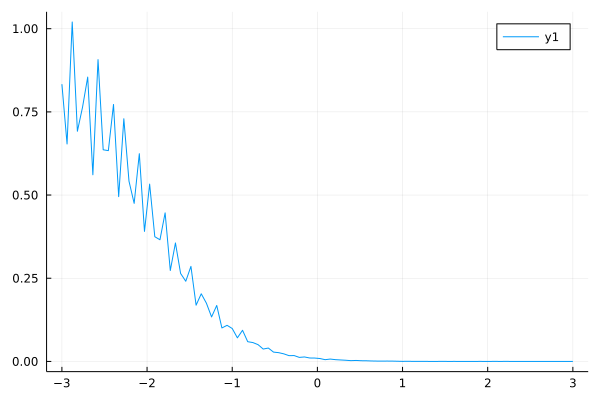

In [49]:
plt.plot(radius, oneBodyDensity)